### plant disease v4, epochs 500

## Project: 🌿Plant Disease Prediction AI model

In [ ]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
# for accuracy and loss graph
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
keras.__version__

'2.8.0'

In [ ]:
train_data_path = "drive/My Drive/I7 CP2/CP2 Project/DLmodel/train"
validation_data_path = "drive/My Drive/I7 CP2/CP2 Project/DLmodel/val"

In [ ]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(224, 224), # all images will be resized to 150x150
                                      batch_size=20,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

validation_generator = test_datagen.flow_from_directory( validation_data_path,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 565 images belonging to 10 classes.
Found 484 images belonging to 10 classes.


In [ ]:
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
for layer in base_model.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
vgghist = model.fit(training_datagen, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

In [ ]:
training_data.class_indices

{'Cherry Powdery_mildew': 0,
 'Cherry healthy': 1,
 'Peach___Bacterial_spot': 2,
 'Peach___healthy': 3,
 'Pepper,_bell___Bacterial_spot': 4,
 'Pepper,_bell___healthy': 5,
 'Strawberry___Leaf_scorch': 6,
 'Strawberry___healthy': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 484 images belonging to 10 classes.


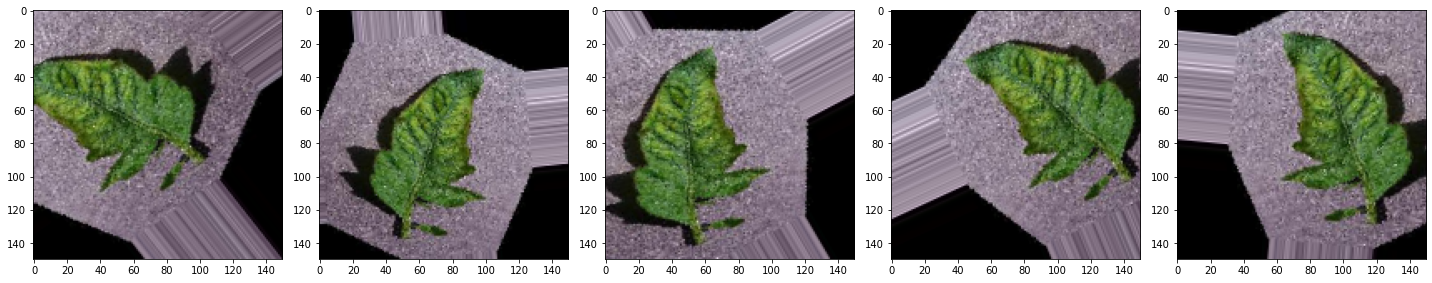

In [ ]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
# save best model using vall accuracy
# model_path = '/content/drive/My Drive/My ML Project /DL Project/CNN/cotton plant disease prediction/v4_pred_cott_dis.h5'
model_path = 'drive/My Drive/I7 CP2/CP2 Project/DLmodel/model/plant_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),
                                    keras.layers.Dense(units=256, activation='relu'),
                                    keras.layers.Dropout(0.25),
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
# train cnn model
history = cnn_model.fit(training_data,
                          epochs=10,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/500
19/19 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0872 
Epoch 1: val_accuracy improved from -inf to 0.09917, saving model to drive/My Drive/I7 CP2/CP2 Project/DLmodel/model/plant_model.h5
19/19 [==============================] - 550s 29s/step - loss: nan - accuracy: 0.0872 - val_loss: nan - val_accuracy: 0.0992
Epoch 2/500
19/19 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0821
Epoch 2: val_accuracy did not improve from 0.09917
19/19 [==============================] - 8s 398ms/step - loss: nan - accuracy: 0.0821 - val_loss: nan - val_accuracy: 0.0992
Epoch 3/500
19/19 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0821
Epoch 3: val_accuracy did not improve from 0.09917
19/19 [==============================] - 8s 400ms/step - loss: nan - accuracy: 0.0821 - val_loss: nan - val_accuracy: 0.0992
Epoch 4/500
19/19 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0821
Epoch 4: val_accuracy 

In [ ]:
model_path2 = 'drive/My Drive/I7 CP2/CP2 Project/DLmodel/model/plant_V1_model.h5'
cnn_model.save(model_path2)

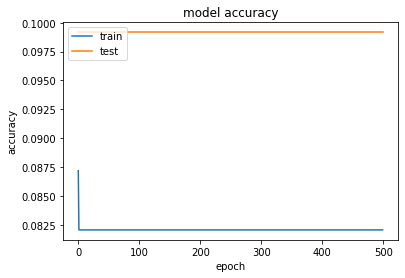

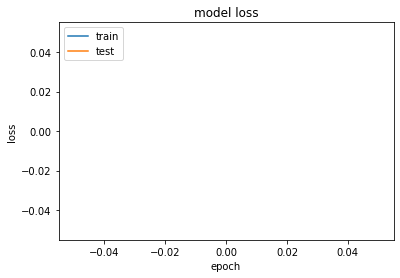

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history.history

{'accuracy': [0.42388519644737244,
  0.5294720530509949,
  0.592004120349884,
  0.628395676612854,
  0.6509482264518738,
  0.6740133166313171,
  0.6806765794754028,
  0.6914402842521667,
  0.7098923921585083,
  0.7098923921585083,
  0.7088672518730164,
  0.7416709661483765,
  0.7416709661483765,
  0.7565351128578186,
  0.7790876626968384,
  0.7719118595123291,
  0.7862634658813477,
  0.8011276125907898,
  0.8036904335021973,
  0.7919015884399414,
  0.8088160157203674,
  0.8118913173675537,
  0.8175294995307922,
  0.8426448106765747,
  0.8277806043624878,
  0.835981547832489,
  0.8308559656143188,
  0.8580214977264404,
  0.8503331542015076,
  0.848795473575592,
  0.8411071300506592,
  0.8580214977264404,
  0.8590466380119324,
  0.8523833751678467,
  0.8616094589233398,
  0.8785238265991211,
  0.8723731637001038,
  0.8631470799446106,
  0.8610968589782715,
  0.8631470799446106,
  0.876473605632782,
  0.8672475814819336,
  0.8703228831291199,
  0.8867247700691223,
  0.889287531375885,
  0